In [1]:
import numpy as np
import pandas as pd

import geopy.distance

import shutil
import os
from collections import OrderedDict

from sklearn import linear_model, metrics

import json

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
from utils.PreProcessor import PreProcessor
preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = True)

**************************************
Converting Raw Datasets into PreProcessed Datasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
{'KQH', 'AGX'}
Opening Sample AirRouteDatasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
{'KQH', 'AGX'}
Opening City-pair wise Domestic Passengers Data
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Opening Indian Railways Data
Opening District Centroid Data
Opening Station Codes Data
Opening Indian Railways Data
0 Trains Scanned out of 5208!
500 Trains Scanned out of 5208!
1000 Trains Scanned out of 5208!
1500 Trains Scanned out of 5208!
2000 Trains Scanned out of 5208!
2500 Trains Scanned out of 5208!
3000 Trains Scanned out of 5208!
3500 Trains Scanned out of 5208!
4000 Trains Scanned out of 5208!
4500 Trains Scanned out of 5208!
5000 Trains Scanned out of 5208!
Opening Economic Data
Opening Population, Area & Household Data
Opening Population Trend Data
A-2
A-2 
A-2
A-2
A-2 
A-2 
A-2
 A-2
A-2
A-2
A-2 
A-2
 A-2
ALERT! Found copy district  pratapgarh in states  rajasthan  and  uttar pradesh
A-2 
ALERT! Found copy district  raigarh in states  maharashtra  and  chhattisgarh
A-2 
A-2 
A-2
A-2
ALERT! Found copy district  aurangabad in states  bihar  and  maharashtra
 A-2
ALERT! Found copy district  hamirpur in states  himachal pradesh  and  uttar pradesh
ALERT! Found c

In [3]:
PRESENT_YEAR = 2023

In [4]:
tier_1_2_cities = [
    'Ahmedabad', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai', 'Hyderabad', 'Kolkata', 'Delhi', 'Visakhapatnam', 'Guwahati', 'Patna',
    'Raipur', 'Gurugram', 'Shimla', 'Jamshedpur', 'Thiruvananthapuram', 'Bhopal', 'Bhubaneswar', 'Amritsar', 'Jaipur', 'Lucknow', 'Dehradun'
]
tier_1_2_cities = tier_1_2_cities + (
    "Guntur, Kakinada, Kurnool, Nellore, Rajamahendravaram, Vijayawada".split(', ')
) + (
    "Bilaspur, Bhilai".split(', ')
) + (
    "Anand, Bhavnagar, Dahod, Jamnagar, Rajkot, Surat, Vadodara".split(', ')
) + (
    "Faridabad, Karnal".split(', ')
) + (
    "Hamirpur".split(', ')
) + (
    "Bokaro Steel City, Dhanbad, Ranchi".split(', ')
) + (
    "Belagavi, Hubballi-Dharwad, Kalaburagi, Mangaluru, Mysuru, Vijayapura".split(', ')
) + (
    "Kannur, Kochi, Kollam, Kozhikode, Malappuram, Thrissur".split(', ')
) + (
    "Gwalior, Indore, Jabalpur, Ratlam, Ujjain".split(', ')
) + (
    "Amravati, Aurangabad, Bhiwandi, Dombivli, Jalgaon, Kolhapur, Nagpur, Nanded, Nashik, Sangli, Solapur, Vasai-Virar".split(', ')
) + (
    "Cuttack, Rourkela".split(', ')
) + (
    "Jalandhar, Ludhiana".split(', ')
) + (
    "Ajmer, Bikaner, Jodhpur".split(', ')
) + (
    "Coimbatore, Erode, Madurai, Salem, Thanjavur, Tiruchirappalli, Tirunelveli, Tiruvannamalai, Vellore".split(', ')
) + (
    "Warangal".split(', ')
) + (
    "Agra, Aligarh, Bareilly, Ghaziabad, Gorakhpur, Jhansi, Kanpur, Mathura, Meerut, Moradabad, Noida, Prayagraj, Varanasi".split(', ')
) + (
    "Asansol, Berhampore, Burdwan, Durgapur, Purulia, Siliguri".split(', ')
) + (
    "Chandigarh, Jammu, Puducherry, Srinagar".split(', ')
)

In [5]:
distance_time_curve_fit = np.polyfit(preprocessor.all_network_data['Distance'].values, preprocessor.all_network_data['Time'].values, 1)

def get_route_passenger_traffic_data(cities):
    city_to_city_mapping = dict(zip(preprocessor.city_mapping['DomesticPassengerTraffic_City'], preprocessor.city_mapping['City']))
    route_traffic = []
    for idx, row in preprocessor.total_domestic_data.iterrows():
        if((row['FROM'] in city_to_city_mapping) and (row['TO'] in city_to_city_mapping)):
            route_traffic.append([city_to_city_mapping[row['FROM']], city_to_city_mapping[row['TO']], row['PASSENGERS']])
    route_traffic_df = pd.DataFrame(route_traffic, columns = ['From', 'To', 'Passengers_Target'])
    return route_traffic_df

route_traffic_df = get_route_passenger_traffic_data(tier_1_2_cities)
route_traffic_df['Year'] = pd.Series([PRESENT_YEAR] * route_traffic_df.shape[0])
route_traffic_df['Connecting'] = pd.Series([''] * route_traffic_df.shape[0])

In [6]:
route_traffic_df.shape

(1024, 5)

In [7]:
route_traffic_df.head()

,From,To,Passengers_Target,Year,Connecting
0,Agra,Ahmedabad,5164.0,2023,
1,Agra,Bengaluru,28588.0,2023,
2,Agra,Bhopal,2601.0,2023,
3,Agra,Lucknow,5545.0,2023,
4,Agra,Mumbai,15067.0,2023,


In [8]:
def get_railways_info_features(raw_route_traffic_df):
    route_traffic_df = raw_route_traffic_df.copy()
    railway_info = []
    city_to_district_mapping = dict(zip(preprocessor.city_mapping['City'].values, preprocessor.city_mapping['StationCodeData_District'].values))
    for idx, row in route_traffic_df.iterrows():
        from_district = city_to_district_mapping[row['From']]
        to_district = city_to_district_mapping[row['To']]
        if(from_district not in preprocessor.city_to_city_train_dict):
            railway_info.append([row['From'], row['To'], row['Year']] + [0, np.nan, np.nan])
        else:
            if(to_district not in preprocessor.city_to_city_train_dict[from_district]):
                railway_info.append([row['From'], row['To'], row['Year']] + [0, np.nan, np.nan])
            else:
                route_railway_info = preprocessor.city_to_city_train_dict[from_district][to_district]
                num_trains = len(route_railway_info)
                avg_duration = np.nanmean([x['duration'] for x in route_railway_info])
                third_ac = np.nansum([x['third_ac'] for x in route_railway_info])
                chair_car = np.nansum([x['chair_car'] for x in route_railway_info])
                first_class = np.nansum([x['first_class'] for x in route_railway_info])
                sleeper = np.nansum([x['sleeper'] for x in route_railway_info])
                second_ac = np.nansum([x['second_ac'] for x in route_railway_info])
                first_ac = np.nansum([x['first_ac'] for x in route_railway_info])
                # Based on https://en.wikipedia.org/wiki/Indian_Railways_coaching_stock & https://www.quora.com/What-is-the-capacity-of-normal-Indian-passenger-train
                #   first_ac -> 20 (1x20)
                #   second_ac -> 100 (2x50)
                #   third_ax -> 180 (3x60)
                #   chair_car -> 150 (75x2)
                #   sleeper -> 840 (12x70)
                #   first_class -> 20 (1x20)
                capacity = (
                    first_ac * 20 +
                    second_ac * 100 +
                    third_ac * 180 +
                    chair_car * 150 +
                    sleeper * 840 +
                    first_class * 20
                )
                # Forecasting growth of railways
                #    -> Based on https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiQp_S3qNP9AhXIwTgGHYuaB5EQFnoECA8QAQ&url=https%3A%2F%2Findianrailways.gov.in%2Frailwayboard%2Fuploads%2Fdirectorate%2Fstat_econ%2FAnnual-Reports-2020-2021%2FAnnual-Report-English.pdf&usg=AOvVaw2YMsSpEfqTOjBD13N-ZsJl,
                #    -> On average, over the past decade, number of passenger coaches increased by ~1000 per year while total running track increased by ~1000 km per year
                #    -> On average, growth rate in railway connectivity & passenger capacity was ~2% per year
                num_trains = num_trains + num_trains * (2 / 100) * (row['Year'] - PRESENT_YEAR)
                capacity = capacity + capacity * (2 / 100) * (row['Year'] - PRESENT_YEAR)
                railway_info.append([row['From'], row['To'], row['Year']] + [num_trains, avg_duration, capacity])
    railway_info_df = pd.DataFrame(railway_info, columns = ['From', 'To', 'Year', 'NumTrains_Railways', 'Duration_Railways', 'Capacity_Railways'])
    route_traffic_df = pd.merge(route_traffic_df, railway_info_df, on = ['From', 'To', 'Year'], how = 'left')
    return route_traffic_df

route_traffic_df = get_railways_info_features(route_traffic_df)

In [9]:
route_traffic_df.head()

,From,To,Passengers_Target,Year,Connecting,NumTrains_Railways,Duration_Railways,Capacity_Railways
0,Agra,Ahmedabad,5164.0,2023,,13.0,1114.259615,14560.0
1,Agra,Bengaluru,28588.0,2023,,8.0,1983.722917,4900.0
2,Agra,Bhopal,2601.0,2023,,58.0,456.503154,56470.0
3,Agra,Lucknow,5545.0,2023,,22.0,493.423726,22450.0
4,Agra,Mumbai,15067.0,2023,,12.0,1352.857233,12640.0


In [10]:
OVERLAY_TIME = 120
airport_to_coords_mapping = dict(zip(preprocessor.city_mapping['AirRouteData_AirportCode'].values, preprocessor.city_mapping['Airport_City_Coords'].values))
def get_timing(from_airport, to_airport):
        route_timing_data = preprocessor.all_network_data[(preprocessor.all_network_data['From'] == from_airport) & (preprocessor.all_network_data['To'] == to_airport)]
        if(route_timing_data.shape[0] == 0):
            from_airport_coords = airport_to_coords_mapping[from_airport]
            from_airport_coords_lat = float(from_airport_coords.split(',')[0])
            from_airport_coords_lon = float(from_airport_coords.split(',')[1])
            from_airport_coords = (from_airport_coords_lat, from_airport_coords_lon)
            to_airport_coords = airport_to_coords_mapping[to_airport]
            to_airport_coords_lat = float(to_airport_coords.split(',')[0])
            to_airport_coords_lon = float(to_airport_coords.split(',')[1])
            to_airport_coords = (to_airport_coords_lat, to_airport_coords_lon)
            route_distance = geopy.distance.geodesic(from_airport_coords, to_airport_coords).miles
            route_timing = route_distance * distance_time_curve_fit[0] + distance_time_curve_fit[1]
        else:
            assert(route_timing_data['Time'].nunique() == 1)
            route_distance = route_timing_data['Distance'].mean()
            route_timing = route_timing_data['Time'].mean()
        return route_timing, route_distance

def get_route_timing_features(raw_route_traffic_df):

    route_traffic_df = raw_route_traffic_df.copy()
    route_timings = []
    city_to_airport_mapping = dict(zip(preprocessor.city_mapping['City'].values, preprocessor.city_mapping['AirRouteData_AirportCode'].values))
    for idx, row in route_traffic_df.iterrows():
        from_airport = city_to_airport_mapping[row['From']]
        to_airport = city_to_airport_mapping[row['To']]
        connecting = row['Connecting']
        if(connecting == ''):
            route_timing = get_timing(from_airport, to_airport)[0]
        else:
            connecting_airport = city_to_airport_mapping[connecting]
            route_timing = get_timing(from_airport, connecting_airport)[0] + get_timing(connecting_airport, to_airport)[0] + OVERLAY_TIME
        route_timings.append(route_timing)
    route_traffic_df['Duration_AirRoute'] = pd.Series(route_timings)
    route_traffic_df['NumTrains_Railways'] = route_traffic_df['NumTrains_Railways'].fillna(0)
    return route_traffic_df

route_traffic_df = get_route_timing_features(route_traffic_df)

In [11]:
route_traffic_df.head()

,From,To,Passengers_Target,Year,Connecting,NumTrains_Railways,Duration_Railways,Capacity_Railways,Duration_AirRoute
0,Agra,Ahmedabad,5164.0,2023,,13.0,1114.259615,14560.0,135.000000
1,Agra,Bengaluru,28588.0,2023,,8.0,1983.722917,4900.0,145.000000
2,Agra,Bhopal,2601.0,2023,,58.0,456.503154,56470.0,77.802403
3,Agra,Lucknow,5545.0,2023,,22.0,493.423726,22450.0,65.000000
4,Agra,Mumbai,15067.0,2023,,12.0,1352.857233,12640.0,119.130475


In [12]:
pca_vals_df = pd.read_csv(f'PreProcessed_Datasets/Models/Present_Features/data_pca_X.csv')
pca_cols = ['City_' + x for x in pca_vals_df.columns if x != 'City']
pca_vals_df.columns = pca_cols + ['City']
pca_vals_df['Year'] = pd.Series([PRESENT_YEAR] * pca_vals_df.shape[0])

total_pca_vals_df = pca_vals_df

In [14]:
total_pca_vals_df.tail()

,City_economic_pca1,City_economic_pca2,City_tourism_pca1,City_tourism_pca2,City_education_pca1,City_education_pca2,City_population_pca1,City_population_pca2,City,Year
57,-8.996071e-02,0.0,-0.225792,-0.065038,0.228733,2.135305,1.629745,-1.593065,Siliguri,2023
58,-1.322687e-16,0.0,0.042147,-0.349667,-4.241148,-1.819083,-2.702539,1.994753,Chandigarh,2023
59,-1.322687e-16,0.0,-0.817877,0.203390,-3.967447,-1.064713,-2.222291,-0.036329,Jammu,2023
60,-1.322687e-16,0.0,-0.817877,0.203390,-4.332237,-1.118788,-2.930138,1.360509,Puducherry,2023
61,-1.322687e-16,0.0,-0.101896,-0.316988,-4.414638,-1.233323,-2.817262,1.112927,Srinagar,2023


In [15]:
def get_pca_vals_features(raw_route_traffic_df):
    route_traffic_df = raw_route_traffic_df.copy()
    route_traffic_df = pd.merge(route_traffic_df, total_pca_vals_df, left_on = ['From', 'Year'], right_on = ['City', 'Year'], how = 'left')
    route_traffic_df = pd.merge(route_traffic_df, total_pca_vals_df, left_on = ['To', 'Year'], right_on = ['City', 'Year'], how = 'left', suffixes = ('_pca_vals_FROM', '_pca_vals_TO'))

    route_traffic_df = route_traffic_df.drop(['City_pca_vals_TO', 'City_pca_vals_FROM'], axis = 1)
    for col in pca_cols:
        route_traffic_df[f'{col}_avg_PCA'] = (route_traffic_df[f'{col}_pca_vals_FROM'] + route_traffic_df[f'{col}_pca_vals_TO']) / 2
        route_traffic_df[f'{col}_diff_PCA'] = (route_traffic_df[f'{col}_pca_vals_FROM'] - route_traffic_df[f'{col}_pca_vals_TO'])
        route_traffic_df = route_traffic_df.drop([f'{col}_pca_vals_FROM', f'{col}_pca_vals_TO', f'{col}_pca_vals_FROM', f'{col}_pca_vals_TO'], axis = 1)

    return route_traffic_df

route_traffic_df = get_pca_vals_features(route_traffic_df)

In [16]:
route_traffic_df.head()

,From,To,Passengers_Target,Year,Connecting,NumTrains_Railways,Duration_Railways,Capacity_Railways,Duration_AirRoute,City_economic_pca1_avg_PCA,...,City_tourism_pca2_avg_PCA,City_tourism_pca2_diff_PCA,City_education_pca1_avg_PCA,City_education_pca1_diff_PCA,City_education_pca2_avg_PCA,City_education_pca2_diff_PCA,City_population_pca1_avg_PCA,City_population_pca1_diff_PCA,City_population_pca2_avg_PCA,City_population_pca2_diff_PCA
0,Agra,Ahmedabad,5164.0,2023,,13.0,1114.259615,14560.0,135.000000,-0.172426,...,0.220607,0.034435,2.033819,-6.545985,0.361837,-0.165564,1.423482,-2.774915,0.575270,-1.100329
1,Agra,Bengaluru,28588.0,2023,,8.0,1983.722917,4900.0,145.000000,1.128601,...,-0.042184,0.560017,6.960727,-16.399801,-0.073334,0.704778,3.297287,-6.522525,0.256770,-0.463330
2,Agra,Bhopal,2601.0,2023,,58.0,456.503154,56470.0,77.802403,-0.466923,...,-0.683949,1.843547,-1.829145,1.179943,-0.507111,1.572331,-0.797849,1.667747,0.417191,-0.784170
3,Agra,Lucknow,5545.0,2023,,22.0,493.423726,22450.0,65.000000,-0.257111,...,-0.005929,0.487506,0.147233,-2.772813,-0.567795,1.693699,0.143515,-0.214980,0.401560,-0.752909
4,Agra,Mumbai,15067.0,2023,,12.0,1352.857233,12640.0,119.130475,2.906459,...,-0.851246,2.178141,8.009375,-18.497097,0.209156,0.139797,4.151842,-8.231635,2.661497,-5.272783


In [17]:
route_traffic_df.shape

(1024, 25)

In [18]:
y_features = [x for x in route_traffic_df.columns if x.endswith('_Target')]
X_features = [x for x in route_traffic_df.columns if (x.endswith('_PCA')) or (x.endswith('_AirRoute')) or (x.endswith('_Railways'))]

In [19]:
# Trimming data for model training - Removing routes having no target variable
# Standardizing data
valid_route_traffic_df = route_traffic_df.copy()
cols_standardization_vals = {}
for col_idx, col in enumerate(valid_route_traffic_df.columns):
    if((col in X_features) or (col in y_features)):
        if(col in y_features):
            to_drop_idx = pd.isnull(valid_route_traffic_df[col])
            to_drop_idx = to_drop_idx[to_drop_idx == True].index
            valid_route_traffic_df = valid_route_traffic_df.drop(to_drop_idx, axis = 0)
        elif(col in X_features):
            col_mean = np.nanmean(valid_route_traffic_df[col].values)
            valid_route_traffic_df[col] = valid_route_traffic_df[col].fillna(col_mean)
        col_mean = valid_route_traffic_df[col].mean()
        col_std = valid_route_traffic_df[col].std()
        valid_route_traffic_df[col] = (valid_route_traffic_df[col] - col_mean) / (col_std + 1e-20)
        cols_standardization_vals[col] = {'mean': col_mean, 'std': col_std}

In [20]:
valid_route_traffic_df.head()

,From,To,Passengers_Target,Year,Connecting,NumTrains_Railways,Duration_Railways,Capacity_Railways,Duration_AirRoute,City_economic_pca1_avg_PCA,...,City_tourism_pca2_avg_PCA,City_tourism_pca2_diff_PCA,City_education_pca1_avg_PCA,City_education_pca1_diff_PCA,City_education_pca2_avg_PCA,City_education_pca2_diff_PCA,City_population_pca1_avg_PCA,City_population_pca1_diff_PCA,City_population_pca2_avg_PCA,City_population_pca2_diff_PCA
0,Agra,Ahmedabad,-0.413253,2023,,0.287857,-0.318227,0.291871,0.588996,-0.578523,...,0.199447,0.016679,-0.227020,-0.539063,0.907775,-0.095936,0.328409,-0.653088,-0.190448,-0.343598
1,Agra,Bengaluru,-0.313362,2023,,-0.051266,0.973200,-0.456276,0.854732,0.667925,...,-0.060234,0.271257,0.778719,-1.350527,0.360802,0.408382,1.302934,-1.535105,-0.436807,-0.144684
2,Agra,Bhopal,-0.424183,2023,,3.339963,-1.295204,3.537712,-0.930947,-0.860665,...,-0.694403,0.892963,-1.015573,0.097169,-0.184419,0.911085,-0.826856,0.392512,-0.312722,-0.244872
3,Agra,Lucknow,-0.411628,2023,,0.898278,-1.240365,0.902935,-1.271153,-0.659656,...,-0.024408,0.236135,-0.612132,-0.228342,-0.260693,0.981411,-0.337273,-0.050597,-0.324813,-0.235110
4,Agra,Mumbai,-0.371022,2023,,0.220032,0.036165,0.143171,0.167286,2.371200,...,-0.859719,1.055031,0.992781,-1.523240,0.715868,0.081005,1.747369,-1.937351,1.423248,-1.646525


In [21]:
cols_standardization_vals

{'Passengers_Target': {'mean': 102070.0166015625, 'std': 234495.56452768587},
 'NumTrains_Railways': {'mean': 8.755859375, 'std': 14.74391916486019},
 'Duration_Railways': {'mean': 1328.5086091642158, 'std': 673.2574485115075},
 'Capacity_Railways': {'mean': 10791.39303482587, 'std': 12911.905334018065},
 'Duration_AirRoute': {'mean': 112.83525112333803, 'std': 37.63139107291316},
 'City_economic_pca1_avg_PCA': {'mean': 0.43142931471778345,
  'std': 1.0437878612329408},
 'City_economic_pca1_diff_PCA': {'mean': 4.163336342344337e-17,
  'std': 2.3378904895173784},
 'City_economic_pca2_avg_PCA': {'mean': 0.0, 'std': 0.0},
 'City_economic_pca2_diff_PCA': {'mean': 0.0, 'std': 0.0},
 'City_tourism_pca1_avg_PCA': {'mean': 0.4606940353519727,
  'std': 1.0782279728271307},
 'City_tourism_pca1_diff_PCA': {'mean': -5.551115123125783e-17,
  'std': 2.435438328491267},
 'City_tourism_pca2_avg_PCA': {'mean': 0.018771543467204804,
  'std': 1.0119780938701717},
 'City_tourism_pca2_diff_PCA': {'mean': 5

In [22]:
with open(f'./PreProcessed_Datasets/Models/RouteSelection_cols_standardization.json', 'w') as save_file:
    json.dump(cols_standardization_vals, save_file)

In [23]:
data_X = valid_route_traffic_df[X_features].values
data_y = valid_route_traffic_df[y_features].values[:, 0]
data_cities = [(x[0], x[1]) for x in valid_route_traffic_df[['From', 'To']].values]

In [24]:
X_features

['NumTrains_Railways',
 'Duration_Railways',
 'Capacity_Railways',
 'Duration_AirRoute',
 'City_economic_pca1_avg_PCA',
 'City_economic_pca1_diff_PCA',
 'City_economic_pca2_avg_PCA',
 'City_economic_pca2_diff_PCA',
 'City_tourism_pca1_avg_PCA',
 'City_tourism_pca1_diff_PCA',
 'City_tourism_pca2_avg_PCA',
 'City_tourism_pca2_diff_PCA',
 'City_education_pca1_avg_PCA',
 'City_education_pca1_diff_PCA',
 'City_education_pca2_avg_PCA',
 'City_education_pca2_diff_PCA',
 'City_population_pca1_avg_PCA',
 'City_population_pca1_diff_PCA',
 'City_population_pca2_avg_PCA',
 'City_population_pca2_diff_PCA']

In [25]:
data_X.shape, data_y.shape

((1024, 20), (1024,))

Coefficients:  [0.05782257722893315, 0.03171587116402039, 0.013532312223932622, 0.05689917313999606, 0.29435002501373986, 0.0023281158792980753, 0, 0, 0.4011009349672868, 0.0018470544834576798, 0.12416005842727568, 0.00017248848632748324, 0.5641558644194823, 0.000591426297305951, 0.25467030342269675, 0.00032537137649537223, 0.1600198625476444, 0.003115602149243036, 0.40626395186957737, 0.00012128745016193197]


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


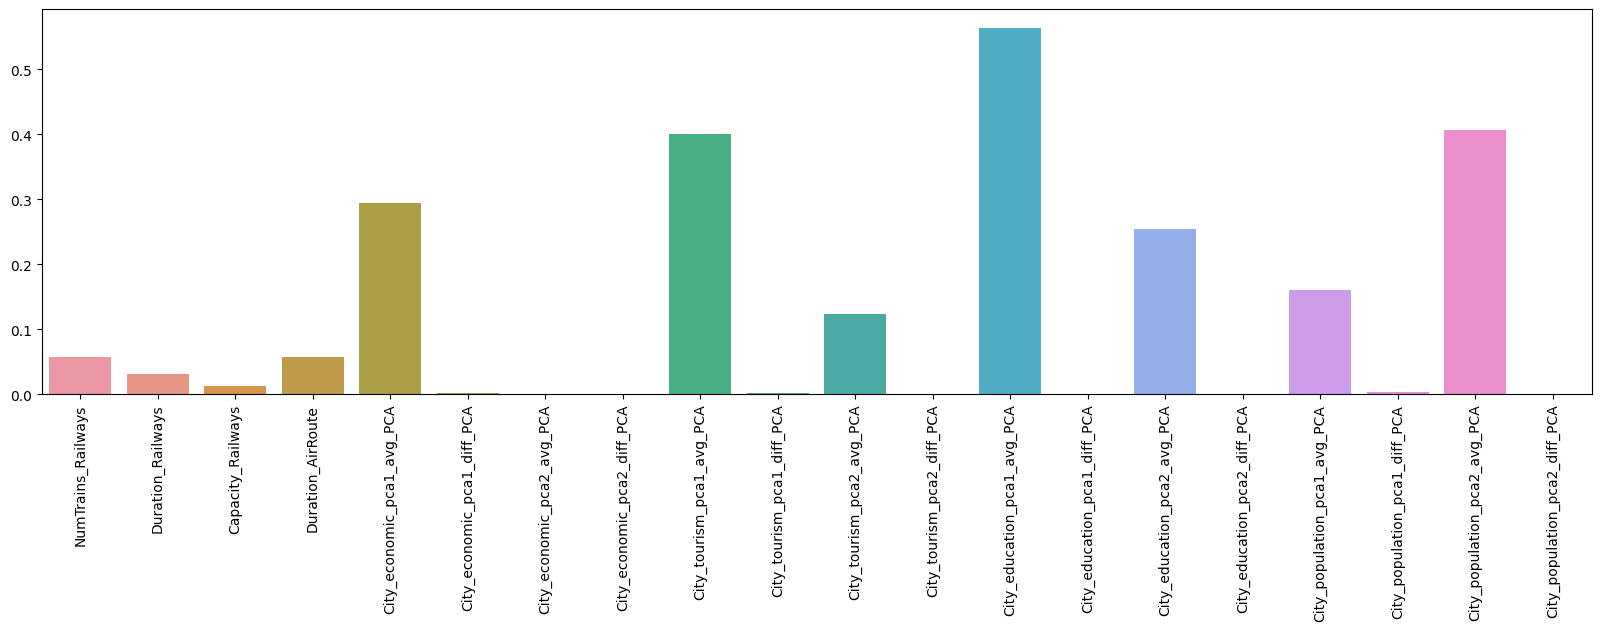

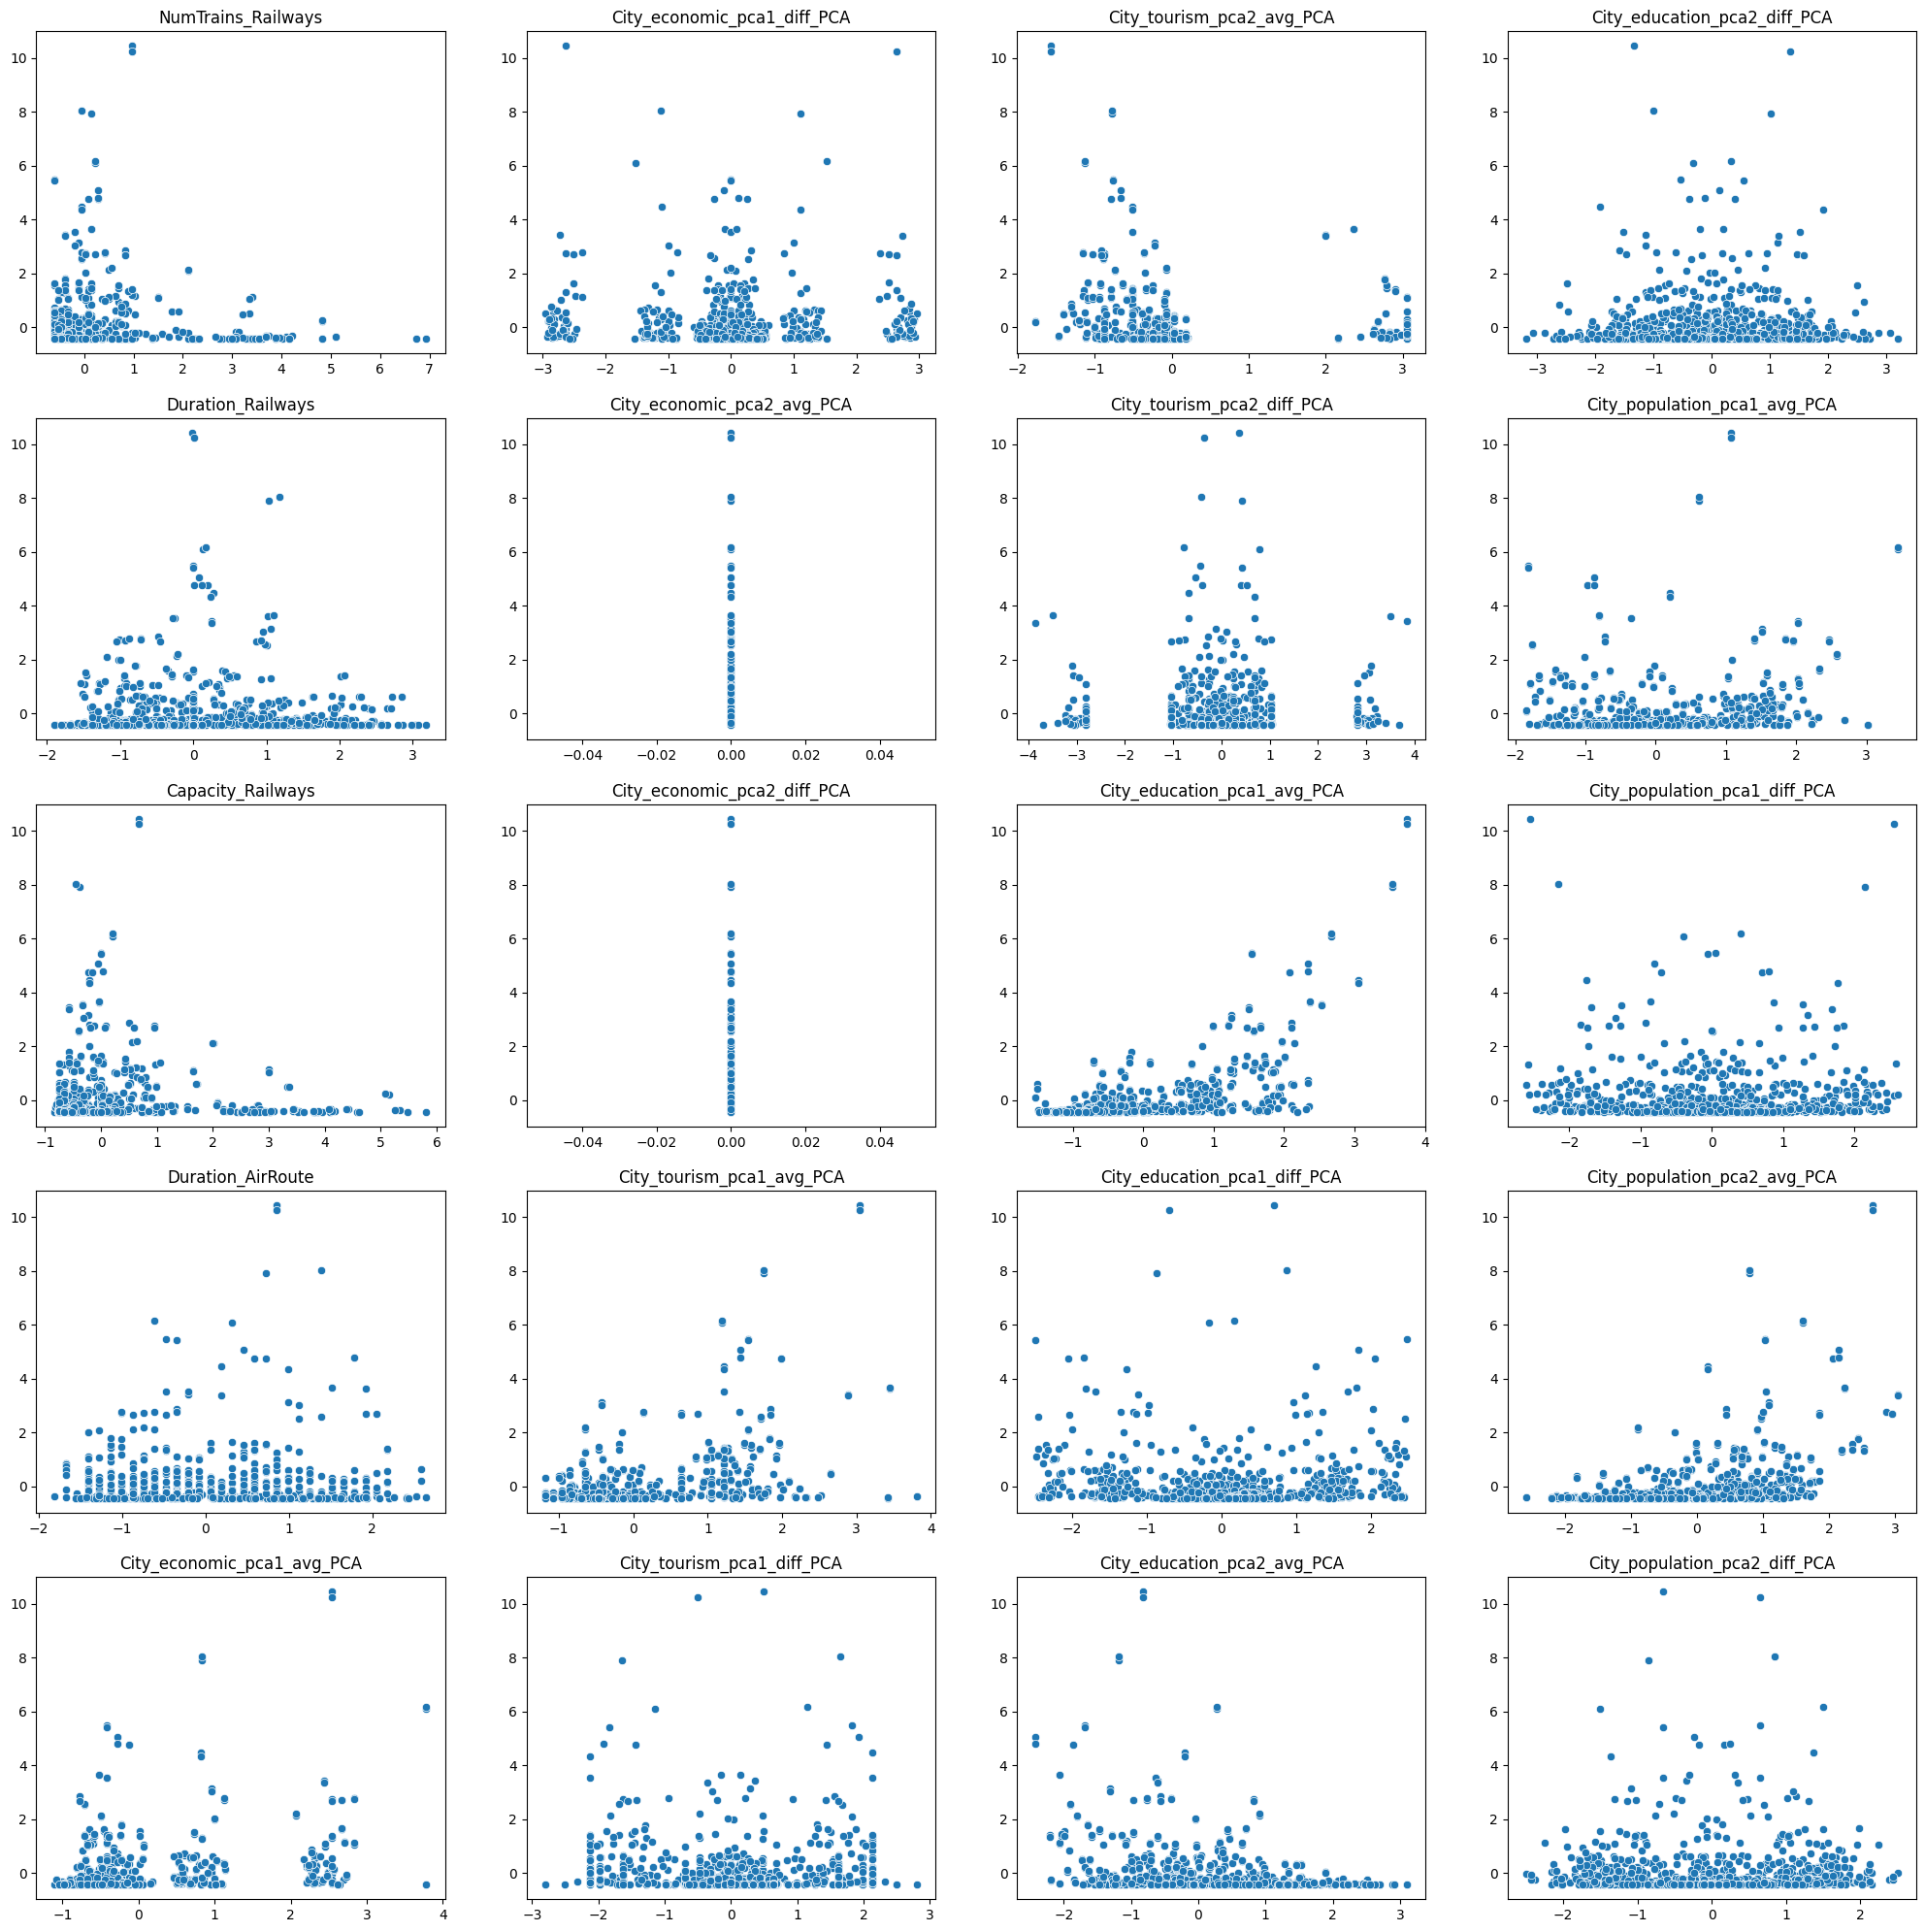

In [26]:
corr_coefs = []
for idx in range(len(X_features)):
    corr = np.abs(np.corrcoef(data_X[:, idx], data_y)[0, 1])
    if(pd.isnull(corr)):
        corr = 0
    corr_coefs.append(corr)
print('Coefficients: ', corr_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = X_features, y = corr_coefs, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()
fig, axes = plt.subplots(5, 4, figsize = (25, 25))
for col_idx, col in enumerate(X_features):
    sns.scatterplot(x = data_X[:, col_idx], y = data_y, ax = axes[col_idx % 5, col_idx // 5])
    axes[col_idx % 5, col_idx // 5].set_title(X_features[col_idx])
plt.show()

In [27]:
model = linear_model.LinearRegression()

In [28]:
maes = []
rmses = []
train_test_split_idx = int(0.8 * data_X.shape[0])
all_idx = np.arange(data_X.shape[0])
for train_iter in range(20):
    np.random.shuffle(all_idx)
    train_idx = all_idx[:train_test_split_idx]; test_idx = all_idx[train_test_split_idx:]
    model = linear_model.LinearRegression()
    model.fit(data_X[train_idx], data_y[train_idx])
    target_mean = cols_standardization_vals[y_features[0]]['mean']
    target_std = cols_standardization_vals[y_features[0]]['std']
    true = data_y[test_idx] * target_std + target_mean
    pred = model.predict(data_X[test_idx]) * target_std + target_mean
    pred[pred < 0] = 0
    mae = metrics.mean_absolute_error(true, pred)
    rmse = np.sqrt(metrics.mean_squared_error(true, pred))
#     sns.scatterplot(x = true, y = pred, label = 'Predictions')
#     sns.lineplot(x = true, y = true, label = 'Zero-error Line', color = 'orange')
#     sns.lineplot(x = true, y = true - 2e5, label = 'Lower error bound', color = 'green')
#     sns.lineplot(x = true, y = true + 2e5, label = 'Upper error bound', color = 'green')
#     plt.legend(loc = 'best')
#     plt.title(f"MAE - {mae:.1f}, RMSE - {rmse:.1f}")
#     plt.show()
    maes.append(mae)
    rmses.append(rmse)
np.mean(maes), np.mean(rmses)

(88565.94264906266, 186353.23631997)

In [29]:
model = linear_model.LinearRegression()
model.fit(data_X, data_y)
model_coefs = OrderedDict(zip(['intercept'] + [*X_features], [model.intercept_] + [*model.coef_]))

In [30]:
import json
with open(f'./PreProcessed_Datasets/Models/RouteSelectionModel_coefs.json', 'w') as save_file:
    json.dump(model_coefs, save_file)